In [1]:
raw_data = readdlm("shmm506a(1).txt")

16384x2 Array{Float64,2}:
 17.9764       3.19441e5
 17.9753       3.10687e5
 17.9742       3.14328e5
 17.9731       2.99796e5
 17.972   297730.0      
 17.9709       2.91169e5
 17.9698       2.9519e5 
 17.9688       2.83677e5
 17.9677  291447.0      
 17.9666  289888.0      
 17.9655       2.81396e5
 17.9644       2.64379e5
 17.9633       2.83005e5
  ⋮                     
  0.0356   51621.2      
  0.0345   52619.4      
  0.0334   45174.4      
  0.0323   44611.4      
  0.0313   45107.1      
  0.0302   43912.8      
  0.0291   46382.1      
  0.028    48410.1      
  0.0269   43608.3      
  0.0258   44506.6      
  0.0247   55321.7      
  0.0236   45386.5      

In [5]:
raw_data2 = readdlm("shmm506a(5).txt")

16384x2 Array{Float64,2}:
 17.9764       7.19531e5
 17.9753       6.83902e5
 17.9742       6.90458e5
 17.9731       6.82518e5
 17.972        6.81054e5
 17.9709       6.5025e5 
 17.9698  646990.0      
 17.9688       6.56214e5
 17.9677       6.51405e5
 17.9666       6.51248e5
 17.9655       6.45799e5
 17.9644  634556.0      
 17.9633       6.40573e5
  ⋮                     
  0.0356  113442.0      
  0.0345       1.21432e5
  0.0334       1.1444e5 
  0.0323       1.15336e5
  0.0313       1.30216e5
  0.0302       1.3159e5 
  0.0291       1.02511e5
  0.028        1.30757e5
  0.0269   97585.9      
  0.0258       1.09921e5
  0.0247       1.44175e5
  0.0236       1.20513e5

In [2]:
using Gadfly

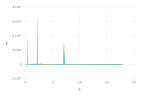

In [8]:
plot(layer(x=raw_data[:,1], y=raw_data[:,2], Geom.LineGeometry),
layer(x=raw_data2[:,1], y=raw_data2[:,2], Geom.LineGeometry, Theme(default_color=colorant"orange")))

In [3]:
using MinMaxFilter

In [28]:
function maxima(spec, window=20, threshold=1e6)

    min_spec, max_spec = minmax_filter(spec, window)
    max_spec = [zeros(div(window,2)); collect(max_spec); zeros(div(window,2)-1)]
    vals = findn(max_spec .== spec)
    vals[spec[vals] .> threshold]
end

maxima (generic function with 3 methods)

In [29]:
peaks1 = raw_data[maxima(raw_data[:,2]), :]
peaks2 = raw_data2[maxima(raw_data2[:,2]), :]

18x2 Array{Float64,2}:
 7.1464  1.34177e8
 7.0664  6.6372e7 
 7.0193  1.49682e8
 3.0042  2.69677e6
 2.8727  3.06494e6
 2.4015  1.63258e6
 2.2886  5.62002e6
 2.2492  3.03219e6
 2.2076  1.796e6  
 2.1276  3.24423e8
 1.9632  2.6815e6 
 1.8065  1.01789e6
 1.3923  2.47779e6
 1.3605  1.26375e6
 1.344   1.21472e6
 0.3227  1.74737e8
 0.2471  1.39033e6
 0.2329  1.47858e6

In [30]:
println(peaks1)
println(peaks2)

[8.4735 1.620707375e6
 8.3792 1.330802875e6
 8.1765 1.431540375e6
 7.1804 8.512556e7
 7.1015 4.2615424e7
 7.0336 1.06317448e8
 2.9933 2.324845e6
 2.9253 5.516686e6
 2.7872 6.79337e6
 2.2854 1.30618575e6
 2.1889 3.98730775e6
 2.1308 2.06831488e8
 2.0618 5.9501345e6
 1.972 1.27085375e6
 0.371 7.0710232e7]
[7.1464 1.34176712e8
 7.0664 6.6371976e7
 7.0193 1.49682224e8
 3.0042 2.6967715e6
 2.8727 3.06494425e6
 2.4015 1.63257975e6
 2.2886 5.620024e6
 2.2492 3.032187e6
 2.2076 1.79599775e6
 2.1276 3.24423232e8
 1.9632 2.6814965e6
 1.8065 1.017890125e6
 1.3923 2.4777915e6
 1.3605 1.26374925e6
 1.344 1.214717875e6
 0.3227 1.74736544e8
 0.2471 1.39033425e6
 0.2329 1.4785845e6]


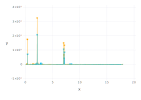

In [31]:
plot(layer(x=raw_data[:,1], y=raw_data[:,2], Geom.LineGeometry),
layer(x=raw_data2[:,1], y=raw_data2[:,2], Geom.LineGeometry, Theme(default_color=colorant"orange")),
layer(x=peaks1[:,1], y=peaks1[:,2], Geom.point),
layer(x=peaks2[:,1], y=peaks2[:,2], Geom.point, Theme(default_color=colorant"orange")))